Reto 1:

Utilizando el dataset de evolución del impacto de Covid-19 a nivel global, disponible en: https://github.com/datasets/covid-19

Realiza:


*  Análisis inicial de los datos (cantidad de filas, países, tipo de datos, fechas)
*  Identifica al menos 2 patrones o tendencias en los datos
* Visualizaciones que suste


In [152]:
#Importamos las  librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

 Cargamos todas las tablas para ver mejor la informacion y seleccionar las que sean de utilidad para el analisis

In [188]:
df_countries=pd.read_csv('countries-aggregated.csv')
df_countries

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462


In [7]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Date       161568 non-null  object
 1   Country    161568 non-null  object
 2   Confirmed  161568 non-null  int64 
 3   Recovered  161568 non-null  int64 
 4   Deaths     161568 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 6.2+ MB


In [8]:
df_countries.isnull().sum()

Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64

In [9]:
df_reference=pd.read_csv('reference.csv')
df_reference

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,Population
0,4,AF,AFG,4.0,NaN,NaN,NaN,Afghanistan,33.939110,67.709953,Afghanistan,38928341.0
1,8,AL,ALB,8.0,NaN,NaN,NaN,Albania,41.153300,20.168300,Albania,2877800.0
2,10,AQ,ATA,10.0,NaN,NaN,NaN,Antarctica,-71.949900,23.347000,Antarctica,NaN
3,12,DZ,DZA,12.0,NaN,NaN,NaN,Algeria,28.033900,1.659600,Algeria,43851043.0
4,20,AD,AND,20.0,NaN,NaN,NaN,Andorra,42.506300,1.521800,Andorra,77265.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4311,84056037,US,USA,840.0,56037.0,Sweetwater,Wyoming,US,41.659439,-108.882788,"Sweetwater, Wyoming, US",42343.0
4312,84056039,US,USA,840.0,56039.0,Teton,Wyoming,US,43.935225,-110.589080,"Teton, Wyoming, US",23464.0
4313,84056041,US,USA,840.0,56041.0,Uinta,Wyoming,US,41.287818,-110.547578,"Uinta, Wyoming, US",20226.0
4314,84056043,US,USA,840.0,56043.0,Washakie,Wyoming,US,43.904516,-107.680187,"Washakie, Wyoming, US",7805.0


In [10]:
df_reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4316 entries, 0 to 4315
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UID             4316 non-null   int64  
 1   iso2            4311 non-null   object 
 2   iso3            4312 non-null   object 
 3   code3           4312 non-null   float64
 4   FIPS            3384 non-null   float64
 5   Admin2          3343 non-null   object 
 6   Province_State  4117 non-null   object 
 7   Country_Region  4316 non-null   object 
 8   Lat             4168 non-null   float64
 9   Long_           4168 non-null   float64
 10  Combined_Key    4316 non-null   object 
 11  Population      4165 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 404.8+ KB


In [11]:
df_reference.isnull().sum()

UID                 0
iso2                5
iso3                4
code3               4
FIPS              932
Admin2            973
Province_State    199
Country_Region      0
Lat               148
Long_             148
Combined_Key        0
Population        151
dtype: int64

In [12]:
df_combined=pd.read_csv('time-series-19-covid-combined.csv')
df_combined

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,NaN,0,0.0,0
1,2020-01-23,Afghanistan,NaN,0,0.0,0
2,2020-01-24,Afghanistan,NaN,0,0.0,0
3,2020-01-25,Afghanistan,NaN,0,0.0,0
4,2020-01-26,Afghanistan,NaN,0,0.0,0
...,...,...,...,...,...,...
231739,2022-04-12,Zimbabwe,NaN,247094,0.0,5460
231740,2022-04-13,Zimbabwe,NaN,247160,0.0,5460
231741,2022-04-14,Zimbabwe,NaN,247208,0.0,5462
231742,2022-04-15,Zimbabwe,NaN,247237,0.0,5462


In [13]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231744 entries, 0 to 231743
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Date            231744 non-null  object 
 1   Country/Region  231744 non-null  object 
 2   Province/State  72624 non-null   object 
 3   Confirmed       231744 non-null  int64  
 4   Recovered       218688 non-null  float64
 5   Deaths          231744 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 10.6+ MB


In [14]:
df_combined.isnull().sum()

Date                   0
Country/Region         0
Province/State    159120
Confirmed              0
Recovered          13056
Deaths                 0
dtype: int64

In [15]:
df_confirmed=pd.read_csv('us_confirmed.csv')
df_confirmed

,Admin2,Date,Case,Country/Region,Province/State
0,Autauga,2020-01-22,0.0,US,Alabama
1,Autauga,2020-01-23,0.0,US,Alabama
2,Autauga,2020-01-24,0.0,US,Alabama
3,Autauga,2020-01-25,0.0,US,Alabama
4,Autauga,2020-01-26,0.0,US,Alabama
...,...,...,...,...,...
2292618,Hockley,2021-05-10,3777.0,US,Texas
2292619,Hockley,2021-05-11,3779.0,US,Texas
2292620,Hockley,2021-05-12,3779.0,US,Texas
2292621,Hockley,2021-05-13,3779.0,US,Texas


In [16]:
df_confirmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2292623 entries, 0 to 2292622
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Admin2          object 
 1   Date            object 
 2   Case            float64
 3   Country/Region  object 
 4   Province/State  object 
dtypes: float64(1), object(4)
memory usage: 87.5+ MB


In [17]:
df_confirmed.isnull().sum()

Admin2            4080
Date                 0
Case                 1
Country/Region       1
Province/State       1
dtype: int64

In [18]:
df_deaths=pd.read_csv('us_deaths.csv')
df_deaths

,Admin2,Date,Case,Country/Region,Province/State
0,Autauga,2020-01-22,0.0,US,Alabama
1,Autauga,2020-01-23,0.0,US,Alabama
2,Autauga,2020-01-24,0.0,US,Alabama
3,Autauga,2020-01-25,0.0,US,Alabama
4,Autauga,2020-01-26,0.0,US,Alabama
...,...,...,...,...,...
2436636,Unassigned,2020-03-22,0.0,US,Utah
2436637,Unassigned,2020-03-23,0.0,US,Utah
2436638,Unassigned,2020-03-24,0.0,US,Utah
2436639,Unassigned,2020-03-25,0.0,US,Utah


In [19]:
df_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2436641 entries, 0 to 2436640
Data columns (total 5 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Admin2          object 
 1   Date            object 
 2   Case            float64
 3   Country/Region  object 
 4   Province/State  object 
dtypes: float64(1), object(4)
memory usage: 93.0+ MB


In [20]:
df_deaths.isnull().sum()

Admin2            4080
Date                 0
Case                 1
Country/Region       1
Province/State       1
dtype: int64

In [201]:
df_simplified=pd.read_csv('us_simplified.csv')
df_simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US
...,...,...,...,...,...,...
2727067,2022-04-12,Weston,Wyoming,1587,18,US
2727068,2022-04-13,Weston,Wyoming,1587,18,US
2727069,2022-04-14,Weston,Wyoming,1587,18,US
2727070,2022-04-15,Weston,Wyoming,1587,18,US


In [81]:
df_simplified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2727072 entries, 0 to 2727071
Data columns (total 6 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   Date            object
 1   Admin2          object
 2   Province/State  object
 3   Confirmed       int64 
 4   Deaths          int64 
 5   Country/Region  object
dtypes: int64(2), object(4)
memory usage: 124.8+ MB


In [82]:
df_simplified.isnull().sum()

Date                 0
Admin2            4896
Province/State       0
Confirmed            0
Deaths               0
Country/Region       0
dtype: int64

In [142]:
df_aggregate=pd.read_csv('worldwide-aggregate.csv')
df_aggregate

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,557,30,17,NaN
1,2020-01-23,657,32,18,17.953321
2,2020-01-24,944,39,26,43.683409
3,2020-01-25,1437,42,42,52.224576
4,2020-01-26,2120,56,56,47.529576
...,...,...,...,...,...
811,2022-04-12,500880363,0,6185040,0.207437
812,2022-04-13,501920234,0,6189593,0.207609
813,2022-04-14,502892186,0,6193401,0.193647
814,2022-04-15,503606396,0,6195647,0.142021


In [104]:
df_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           816 non-null    object 
 1   Confirmed      816 non-null    int64  
 2   Recovered      816 non-null    int64  
 3   Deaths         816 non-null    int64  
 4   Increase rate  815 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 32.0+ KB


In [105]:
df_aggregate.isnull().sum()

Date             0
Confirmed        0
Recovered        0
Deaths           0
Increase rate    1
dtype: int64

DECIDO TRABAJAR CON LAS SIGUIENTES TABLAS
LA INFORMACION DE 'us_confirmed.csv', 'us_death.csv' Y 'us_confirmed.csv' SE 
JUNTAN EN 'us_simplified.csv'.
'reference.csv' CONTIENE LOS CODIGOS DE REFERENCIA Y EN ESTE MOMENTO NO SON DE MI INTERES PORQUE LAS OTRAS TABLAS TIENEN YA LA INFORMACION SOBRE COUNTRY
'worldwide-aggregate.csv' LA DEJARE PENDIENTE PORQUE TIENE LA TASA DE INCREMENTO

*   df_countries
*   df_simplified
*  df_aggregate



In [189]:
df_countries

,Date,Country,Confirmed,Recovered,Deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0
...,...,...,...,...,...
161563,2022-04-12,Zimbabwe,247094,0,5460
161564,2022-04-13,Zimbabwe,247160,0,5460
161565,2022-04-14,Zimbabwe,247208,0,5462
161566,2022-04-15,Zimbabwe,247237,0,5462


ESTA DF NO TIENE NULOS ASI QUE PROCEDERE A EXAMINAR LA DISTRIBUCION DE LA INFORMACION PARA ANALIZAR EL COMPORTAMIENTO DE LOS DATOS 

In [190]:
#PRIMERO VOY A HOMOGENIZAR EL HEADER DE LA TABLA
df_countries.columns=[c.lower().replace(' ', '_') for c in df_countries.columns]
df_countries.head()

,date,country,confirmed,recovered,deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [191]:
#TRANSFORMAMOS LA COLUMNA DE date DE OBJECT A DATETIME
df_countries['date'] = pd.to_datetime(df_countries['date'])
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   date       161568 non-null  datetime64[ns]
 1   country    161568 non-null  object        
 2   confirmed  161568 non-null  int64         
 3   recovered  161568 non-null  int64         
 4   deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB


In [192]:
df_countries.head()

,date,country,confirmed,recovered,deaths
0,2020-01-22,Afghanistan,0,0,0
1,2020-01-23,Afghanistan,0,0,0
2,2020-01-24,Afghanistan,0,0,0
3,2020-01-25,Afghanistan,0,0,0
4,2020-01-26,Afghanistan,0,0,0


In [193]:
# ORDENAMOS EL DF POR LA COLUMNA DE FECHAS
df_countries = df_countries.sort_values(by='date')
df_countries

,date,country,confirmed,recovered,deaths
0,2020-01-22,Afghanistan,0,0,0
44880,2020-01-22,El Salvador,0,0,0
44064,2020-01-22,Egypt,0,0,0
43248,2020-01-22,Ecuador,0,0,0
147696,2020-01-22,Tunisia,0,0,0
...,...,...,...,...,...
104447,2022-04-16,New Zealand,828808,0,554
103631,2022-04-16,Netherlands,8194946,0,22780
102815,2022-04-16,Nepal,978654,0,11951
101183,2022-04-16,Mozambique,225323,0,2200


In [41]:
#UTILIZO LA MATRIZ DE CORRELACION PARA VER QUE COLUMNAS TIENEN MAYOR RELACION A OTRAS
corr_matrix=df_countries.corr()
corr_matrix

,confirmed,recovered,deaths
confirmed,1.000000,0.277797,0.914993
recovered,0.277797,1.000000,0.318160
deaths,0.914993,0.318160,1.000000


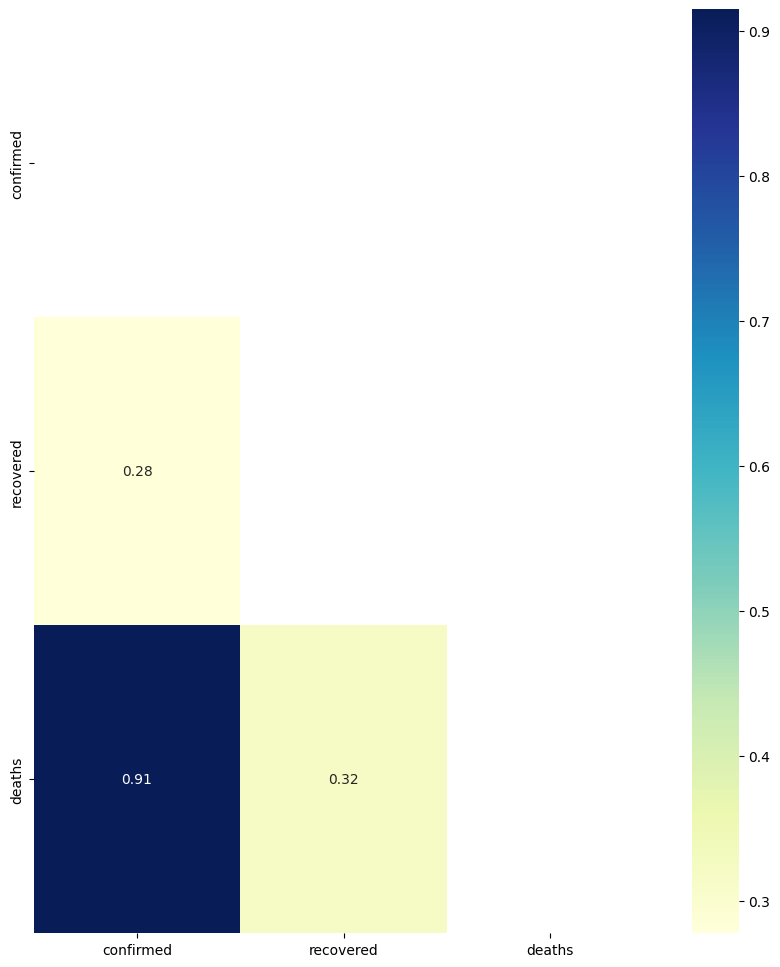

In [42]:
#HAGO EL MAPA DE CALOR 
mascara=np.zeros_like(corr_matrix)
mascara[np.triu_indices_from(mascara) ]=True 

fig , ax=plt.subplots(figsize=(10,12))
ax= sns.heatmap(corr_matrix, mask=mascara, annot=True, cmap='YlGnBu')

LOS DATOS DE CASOS CONFIRMADOS PRESENTAN UNA ALTA RELACION CON LOS DECESOS

In [43]:
#DE LA df_countries SELECCIONO LA COLUMNA country PARA VER CUANTOS PAISES TENGO 
value_counts=df_countries['country'].value_counts()
print('Columna:', 'country', value_counts)  

Columna: country Afghanistan    816
Namibia        816
Netherlands    816
New Zealand    816
Nicaragua      816
              ... 
Ghana          816
Greece         816
Grenada        816
Guatemala      816
Zimbabwe       816
Name: country, Length: 198, dtype: int64


CON EL value.counts PODEMOS VER QUE TENEMOS LOS DATOS DE 198 PAISES 

QUEREMOS VER LA EVOLUCION DE LOS CASOS DE ACUERDO AL TIEMPO POR LO QUE ES MAS FACIL VISUALIZARLO CON GRAFICAS

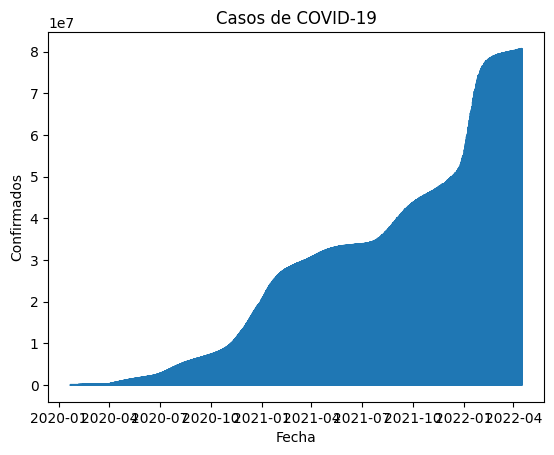

In [196]:
#GRAFICA DE LA EVOLUCION DE LOS CASOS 'confirmed' RESPECTO AL TIEMPO
plt.plot(df_countries['date'], df_countries['confirmed'])
plt.xlabel('Fecha')
plt.ylabel('Confirmados')
plt.title('Casos de COVID-19')
plt.show()

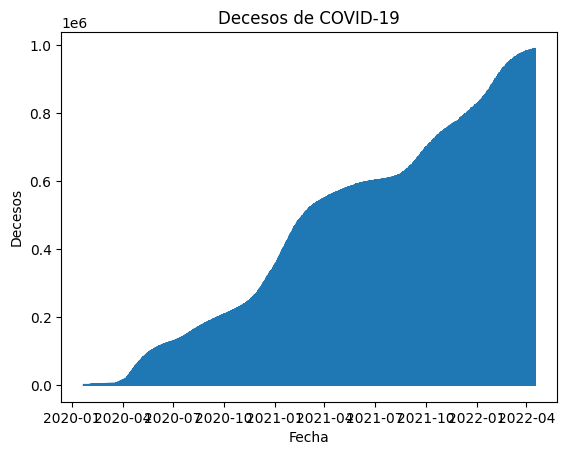

In [199]:
#GRAFICA DE LA EVOLUCION DE LOS CASOS 'deaths' RESPECTO AL TIEMPO
plt.plot(df_countries['date'], df_countries['deaths'])
plt.xlabel('Fecha')
plt.ylabel('Decesos')
plt.title('Decesos de COVID-19')
plt.show()

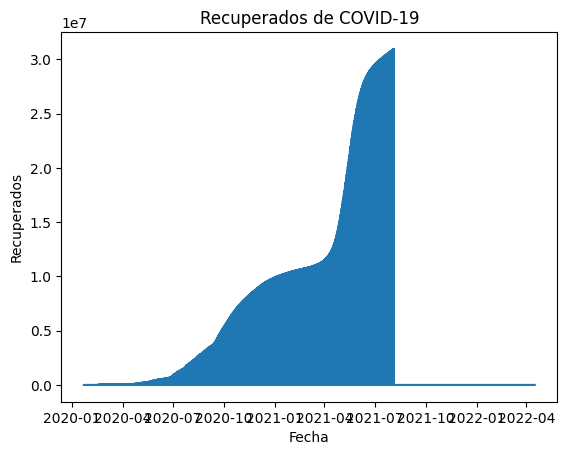

In [200]:
#GRAFICA DE LA EVOLUCION DE LOS CASOS 'recovered' RESPECTO AL TIEMPO
plt.plot(df_countries['date'], df_countries['recovered'])
plt.xlabel('Fecha')
plt.ylabel('Recuperados')
plt.title('Recuperados de COVID-19')
plt.show()



```
OBSERVACIONES 
```

LOS DATOS PRESENTAN UN TENDENCIA LOGARITMICA, AL PRINCIPIO EL CRECIMIENTO ES LENTO Y DESPUES EL INCREMENTO ES MUY SIGNIFICATIVO PARA LOS CASOS CONFIRMADOS Y LOS DECESOS, ESPECIALMENTE EN ESTOS CASOS, LA TENDENCIA ES PARECIDA YA QUE EN EL PERIODO DE FINALES DE 2020 HASTA INICIOS DE 2022 LOS DECESOS FUERON SIGNIFICATIVOS

In [47]:
#SELECCIONAMOS LA DATA NUMERICA 
datanum_countries= df_countries.select_dtypes(include=["float64","int64"])
datanum_countries

,confirmed,recovered,deaths
date,,,
2020-01-22,0,0,0
2020-01-23,0,0,0
2020-01-24,0,0,0
2020-01-25,0,0,0
2020-01-26,0,0,0
...,...,...,...
2022-04-12,247094,0,5460
2022-04-13,247160,0,5460
2022-04-14,247208,0,5462


<ipython-input-187-1a5b78e3526c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




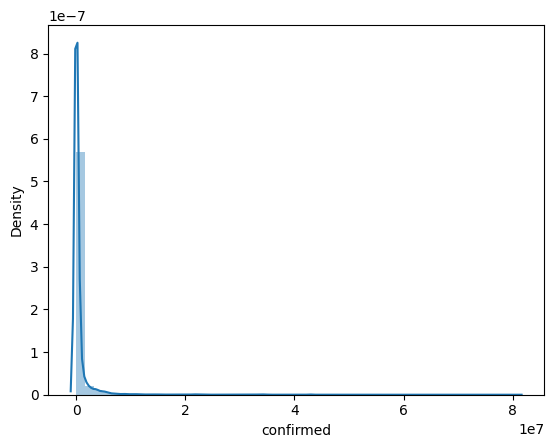

<ipython-input-187-1a5b78e3526c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




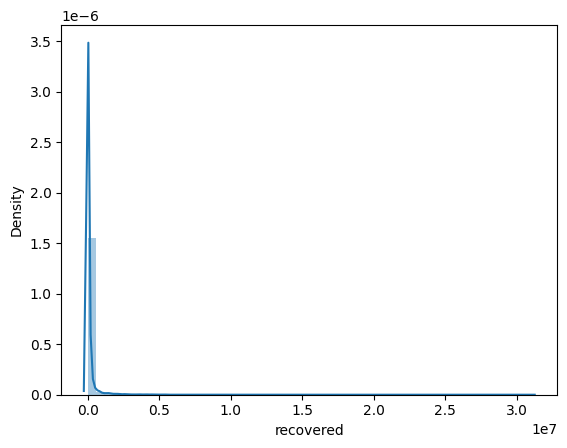

<ipython-input-187-1a5b78e3526c>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




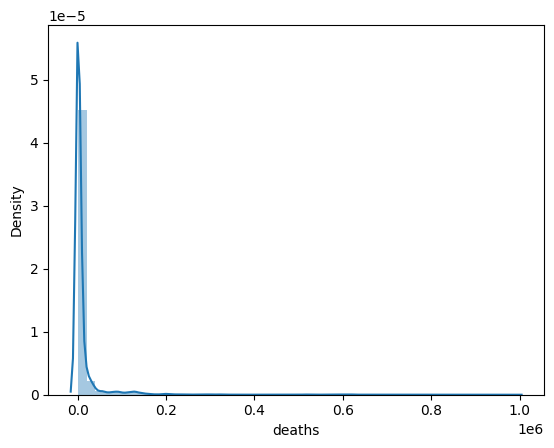

In [187]:
#LA DISTRIBUCION NORMAL NO ES LA OPCION ADECUADA YA QUE SE EN ESTE TIPO DE DISTRIBUCION SE ESPERA QUE LA MAYORÍA DE LOS VALORES SE CONCENTREN ALREDEDOR DE LA MEDIA 
# Y QUE LA FRECUENCIA DE LOS VALORES DISMINUYA A MEDIDA QUE SE ALEJEN DE LA MEDIA, SIN EMBARGO LOS DATOS EXPONENCIALES NO SIGUEN ESA DISTRIBUCION 
for i in datanum_countries:
  sns.distplot(datanum_countries[i])
  plt.show()

AHORA VEREMOS UN  MAPA CON EL NUMERO DE CASOS POR PAIS 
ASI QUE PROCESO A REALIZAR LAS VISUALIZACIONES CORRESPONDIENTES PARA VER MEJOR LA INFORMACION

In [ ]:
df_sum = df_countries.groupby('country').sum().reset_index()

In [ ]:
df_sum

,country,confirmed,recovered,deaths
0,Afghanistan,66031705,18289880,2874099
1,Albania,82385140,22652652,1320658
2,Algeria,94695072,25670233,2651996
3,Andorra,9598486,3085649,75889
4,Angola,26425596,5895800,605294
...,...,...,...,...
193,West Bank and Gaza,187339576,57608773,1893801
194,Winter Olympics 2022,39517,0,0
195,Yemen,3987738,772497,810844
196,Zambia,87545852,21852796,1318781


In [ ]:
#CREAMOS UNA DATASET PARA USAR DESPUES 
df_sum.to_excel('df_countries.xlsx', index=False)

In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 78.6 MB/s eta 0:00:00


In [ ]:
#IMPORTAMOS geopandas PARA PODER HACER UN MAPA 
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
#MEZCLAMOS LAS DF 
merged = world.merge(df_sum, left_on='name', right_on='country', how='left')

In [ ]:
merged

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,confirmed,recovered,deaths
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,14731503.0,176313.0,180541.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6429507.0,84988.0,162598.0
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,876749971.0,264248368.0,15714265.0
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,486052135.0,735730.0,4393081.0
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,65674682.0,19606031.0,903774.0
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,68199012.0,20280591.0,1282881.0
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890...",Trinidad and Tobago,25928311.0,3350829.0,725015.0


In [ ]:
#ELIMINO LOS CAMPOS NULOS PARA TENER MAS LIMPIA LA INFORMACION PARA EL MAPEO
merged_clean=merged.dropna()
merged_clean

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,country,confirmed,recovered,deaths
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,14731503.0,176313.0,180541.0
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,6429507.0,84988.0,162598.0
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,876749971.0,264248368.0,15714265.0
5,18513930.0,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918...",Kazakhstan,388370087.0,91195356.0,5927457.0
6,33580650.0,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,80168187.0,28288270.0,577326.0
...,...,...,...,...,...,...,...,...,...,...
171,2083459.0,Europe,North Macedonia,MKD,12547,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",North Macedonia,93255329.0,29421904.0,3062649.0
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,486052135.0,735730.0,4393081.0
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,65674682.0,19606031.0,903774.0
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787...",Kosovo,68199012.0,20280591.0,1282881.0


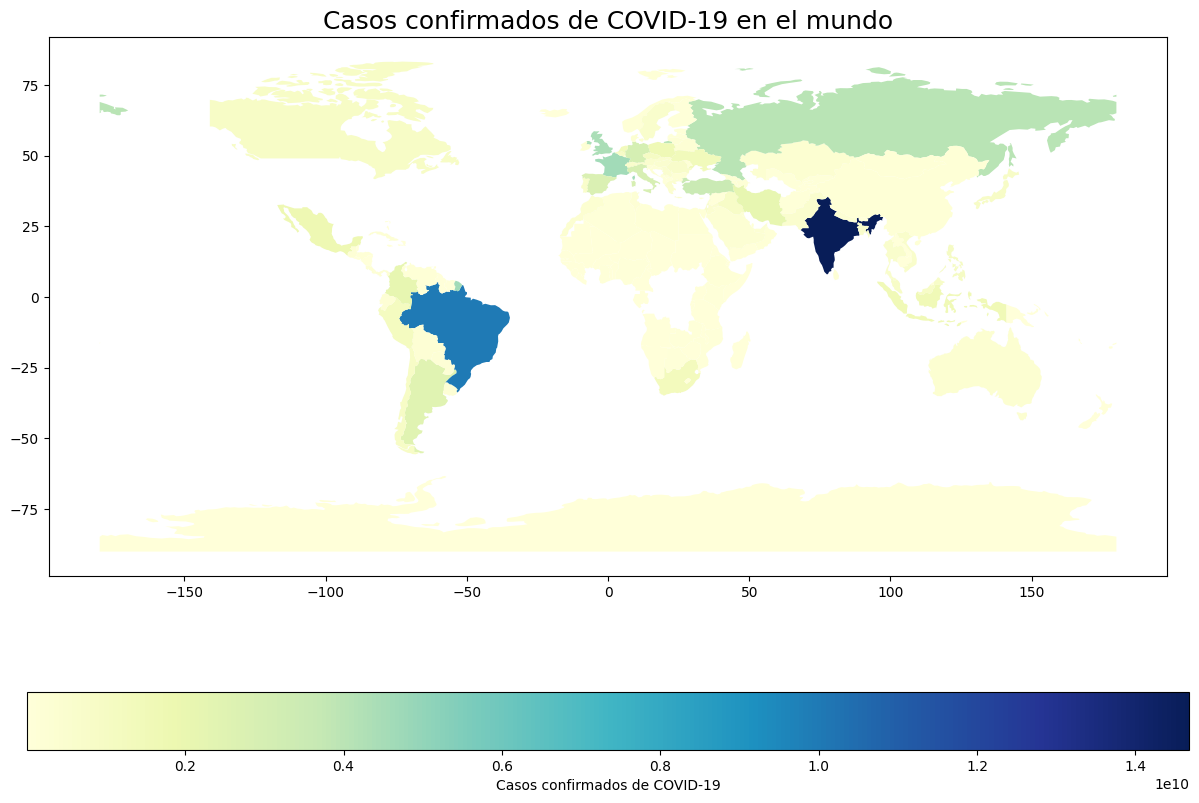

In [ ]:
merged.plot(column='confirmed', cmap='YlGnBu', legend=True, legend_kwds={'label': "Casos confirmados de COVID-19", 'orientation': "horizontal"}, figsize=(15,10))
plt.title('Casos confirmados de COVID-19 en el mundo', fontsize=18)
plt.show()

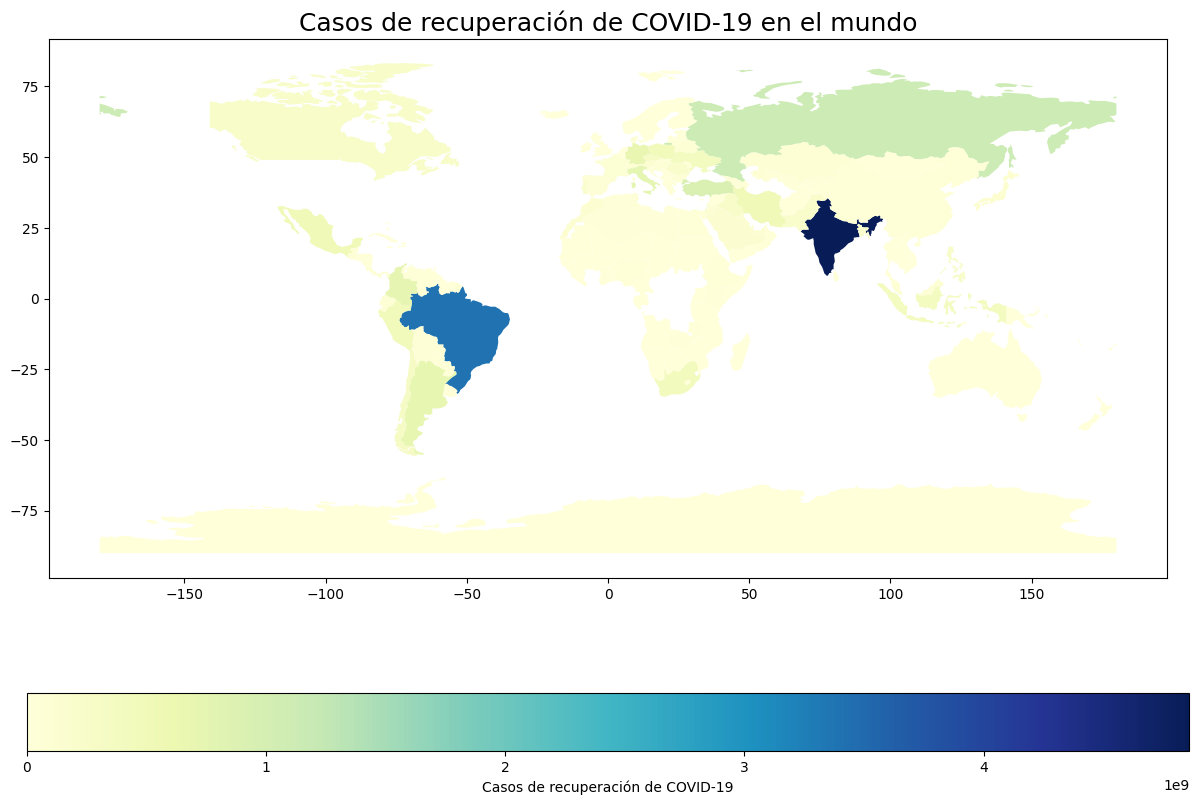

In [ ]:
merged.plot(column='recovered', cmap='YlGnBu', legend=True, legend_kwds={'label': "Casos de recuperación de COVID-19", 'orientation': "horizontal"}, figsize=(15,10))
plt.title('Casos de recuperación de COVID-19 en el mundo', fontsize=18)
plt.show()

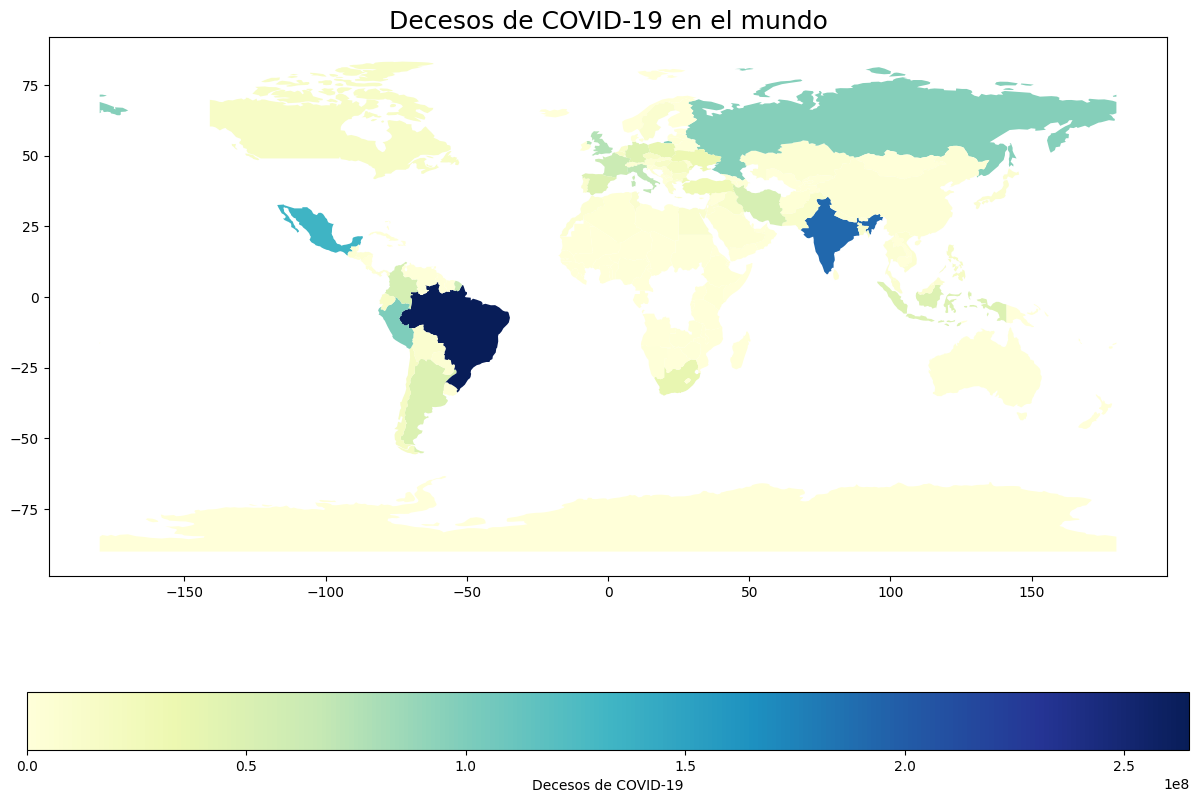

In [ ]:
merged.plot(column='deaths', cmap='YlGnBu', legend=True, legend_kwds={'label': "Decesos de COVID-19", 'orientation': "horizontal"}, figsize=(15,10))
plt.title('Decesos de COVID-19 en el mundo', fontsize=18)
plt.show()

LOS DECESOS FUERON MAS SIGNIFICATIVOS EN MEXICO, BRASIL E INDIA PRINCIPALMENTE ASI COMO EN RUSIA Y PERU 

LOS CASOS DE CONFIRMADOS Y RECUPERADOS SON MUY SIMILARES EN BRASIL Y EN INDIA

TABLA SIGUIENTE

EN ESTA TABLA HAY INFORMACION SOBRE LOS CASOS EN ESTADOS UNIDOS POR PROVINCIA/ESTADO EN ESTADOS UNIDOS SOLAMENTE POR LO QUE VAMOS A ANALIZAR NUEVAMENTE LA DF

In [163]:
df_simplified

,Date,Admin2,Province/State,Confirmed,Deaths,Country/Region
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US
...,...,...,...,...,...,...
2727067,2022-04-12,Weston,Wyoming,1587,18,US
2727068,2022-04-13,Weston,Wyoming,1587,18,US
2727069,2022-04-14,Weston,Wyoming,1587,18,US
2727070,2022-04-15,Weston,Wyoming,1587,18,US


In [202]:
#PRIMERO VOY A HOMOGENIZAR EL HEADER DE LA TABLA
df_simplified.columns=[c.lower().replace(' ', '_') for c in df_simplified.columns]
df_simplified.head()

,date,admin2,province/state,confirmed,deaths,country/region
0,2020-01-22,Autauga,Alabama,0,0,US
1,2020-01-23,Autauga,Alabama,0,0,US
2,2020-01-24,Autauga,Alabama,0,0,US
3,2020-01-25,Autauga,Alabama,0,0,US
4,2020-01-26,Autauga,Alabama,0,0,US


In [203]:
#TRANSFORMAMOS LA COLUMNA DE date DE OBJECT A DATETIME
df_simplified['date'] = pd.to_datetime(df_simplified['date'])
df_simplified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2727072 entries, 0 to 2727071
Data columns (total 6 columns):
 #   Column          Dtype         
---  ------          -----         
 0   date            datetime64[ns]
 1   admin2          object        
 2   province/state  object        
 3   confirmed       int64         
 4   deaths          int64         
 5   country/region  object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 124.8+ MB


In [204]:
#VERIFICAMOS LOS NULOS
df_simplified.isnull().sum()

date                 0
admin2            4896
province/state       0
confirmed            0
deaths               0
country/region       0
dtype: int64

In [205]:
#EXPLORAMOS LOS DATOS QUE CONTIENE
for c in df_simplified:
  value_counts=df_simplified[c].value_counts()
  print('Columna:', c, value_counts)  

Columna: date 2020-01-22    3342
2021-07-23    3342
2021-07-13    3342
2021-07-14    3342
2021-07-15    3342
              ... 
2020-10-22    3342
2020-10-23    3342
2020-10-24    3342
2020-10-25    3342
2022-04-16    3342
Name: date, Length: 816, dtype: int64
Columna: admin2 Unassigned    42432
Washington    25296
Jefferson     21216
Franklin      20400
Jackson       19584
              ...  
Charlevoix      816
Branch          816
Benzie          816
Baraga          816
Weston          816
Name: admin2, Length: 1980, dtype: int64
Columna: province/state Texas                       208896
Georgia                     131376
Virginia                    110160
Kentucky                     99552
Missouri                     96288
Kansas                       87312
Illinois                     84864
North Carolina               83232
Iowa                         82416
Tennessee                    79152
Nebraska                     77520
Indiana                      76704
Ohio              

DECIDO ELIMINAR admin2 y country/region PORQUE NO TENEMOS INFORMACION RELEVANTE EN ESAS COLUMNAS 
EN country/region SIEMPRE ES US y admin2 NO ES RELEVANTE PARA EL ANALISIS, NOS INTERESAN LOS CONDADOS 



In [206]:
df_simplified=df_simplified.drop(['admin2', 'country/region'], axis=1)
df_simplified

,date,province/state,confirmed,deaths
0,2020-01-22,Alabama,0,0
1,2020-01-23,Alabama,0,0
2,2020-01-24,Alabama,0,0
3,2020-01-25,Alabama,0,0
4,2020-01-26,Alabama,0,0
...,...,...,...,...
2727067,2022-04-12,Wyoming,1587,18
2727068,2022-04-13,Wyoming,1587,18
2727069,2022-04-14,Wyoming,1587,18
2727070,2022-04-15,Wyoming,1587,18


In [208]:
# ORDENAMOS RESPECTO A DATE
df_simplified= df_simplified.sort_values(by='date')
df_simplified

,date,province/state,confirmed,deaths
0,2020-01-22,Alabama,0,0
1954320,2020-01-22,Pennsylvania,0,0
1482672,2020-01-22,Nevada,0,0
1483488,2020-01-22,Nevada,0,0
699312,2020-01-22,Iowa,0,0
...,...,...,...,...
1811519,2022-04-16,Oklahoma,2455,41
1810703,2022-04-16,Oklahoma,5943,106
1809887,2022-04-16,Oklahoma,967,11
1871903,2022-04-16,Oregon,3210,48


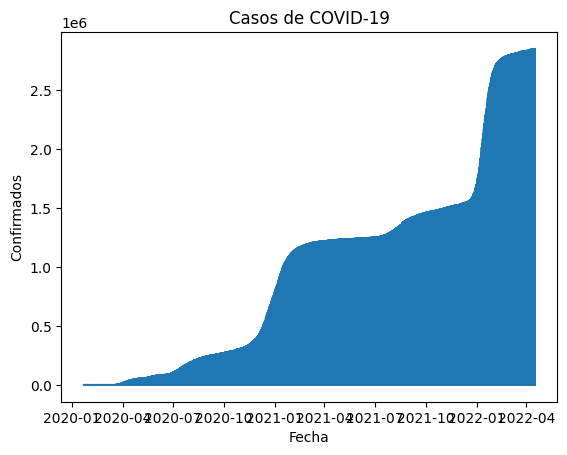

In [209]:
#GRAFICA DE LA EVOLUCION DE LOS CASOS 'confirmed' RESPECTO AL TIEMPO
plt.plot(df_simplified['date'], df_simplified['confirmed'])
plt.xlabel('Fecha')
plt.ylabel('Confirmados')
plt.title('Casos de COVID-19')
plt.show()

SE OBSERVA UNA TENDENCIA MUY PARECIDA A LA ANTERIOR DE TODOS LOS PAISES 

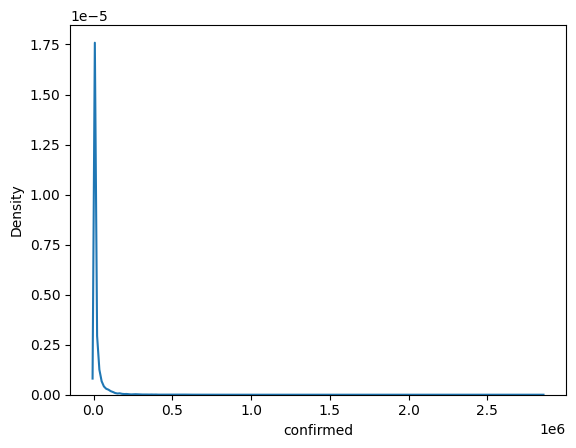

In [171]:
#OTRA GRAFICA
sns.kdeplot(df_simplified['confirmed'])
plt.show()

In [68]:
dfus_sum = df_simplified.groupby('province/state').sum().reset_index()

In [70]:
dfus_sum

,province/state,confirmed,deaths
0,Alabama,388752398,6766804
1,Alaska,58762395,303518
2,American Samoa,117553,171
3,Arizona,595711245,10534111
4,Arkansas,245722861,3749158
5,California,2577921487,34248123
6,Colorado,368881211,4315487
7,Connecticut,218140831,5184770
8,Delaware,72811357,1075812
9,Diamond Princess,37283,0


In [186]:
#CREO UNA DATASET PARA USAR DESPUES 
dfus_sum.to_excel('dfus_sum.xlsx', index=False)

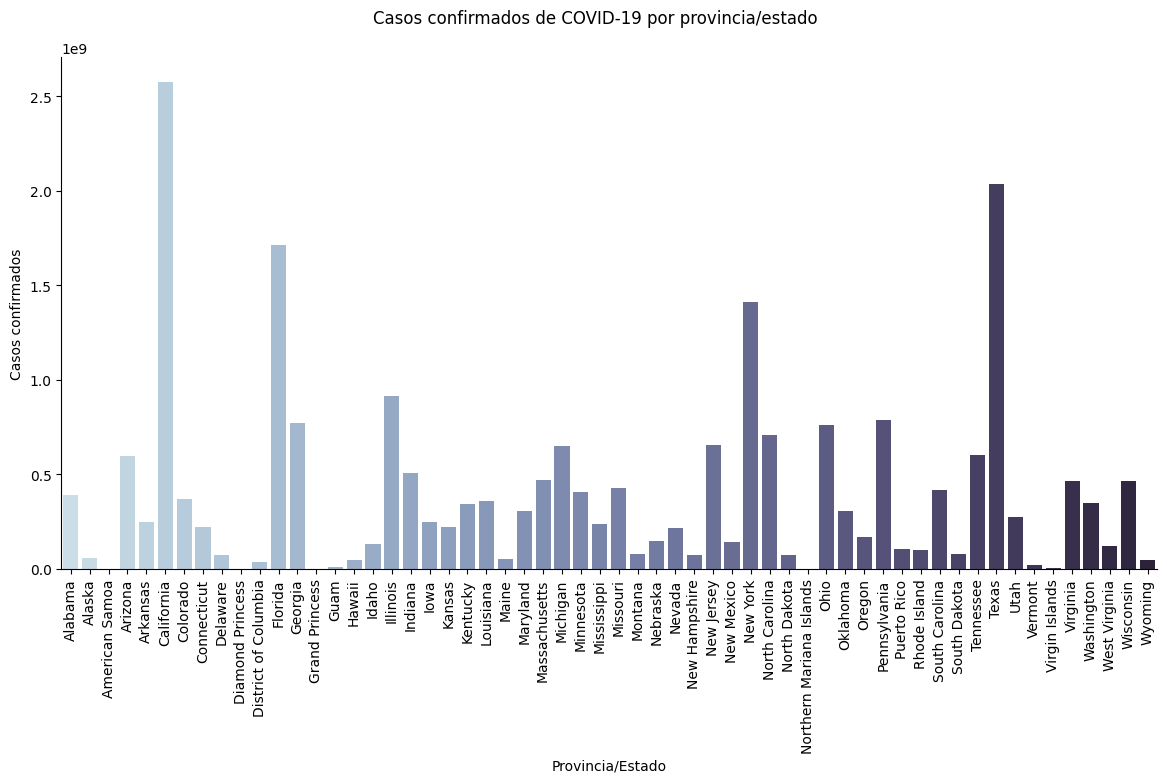

In [101]:
#CREAMOS LA GRAFICA CON PARAMETROS DE AMPLITUD Y ROTACION DE LAS ETIQUETAS EN EL EJE X
g=sns.catplot( x="province/state", y="confirmed", kind="bar", data=dfus_sum, aspect=2, height=6, palette="ch:s=.25,rot=-.25")
g.set_xticklabels(rotation=90)
#ESTABLECER TITULO DE LA GRAFICA Y ETIQUETA DE LOS EJE
g.fig.suptitle("Casos confirmados de COVID-19 por provincia/estado", y=1.03)
g.set(xlabel="Provincia/Estado", ylabel="Casos confirmados")

plt.show()

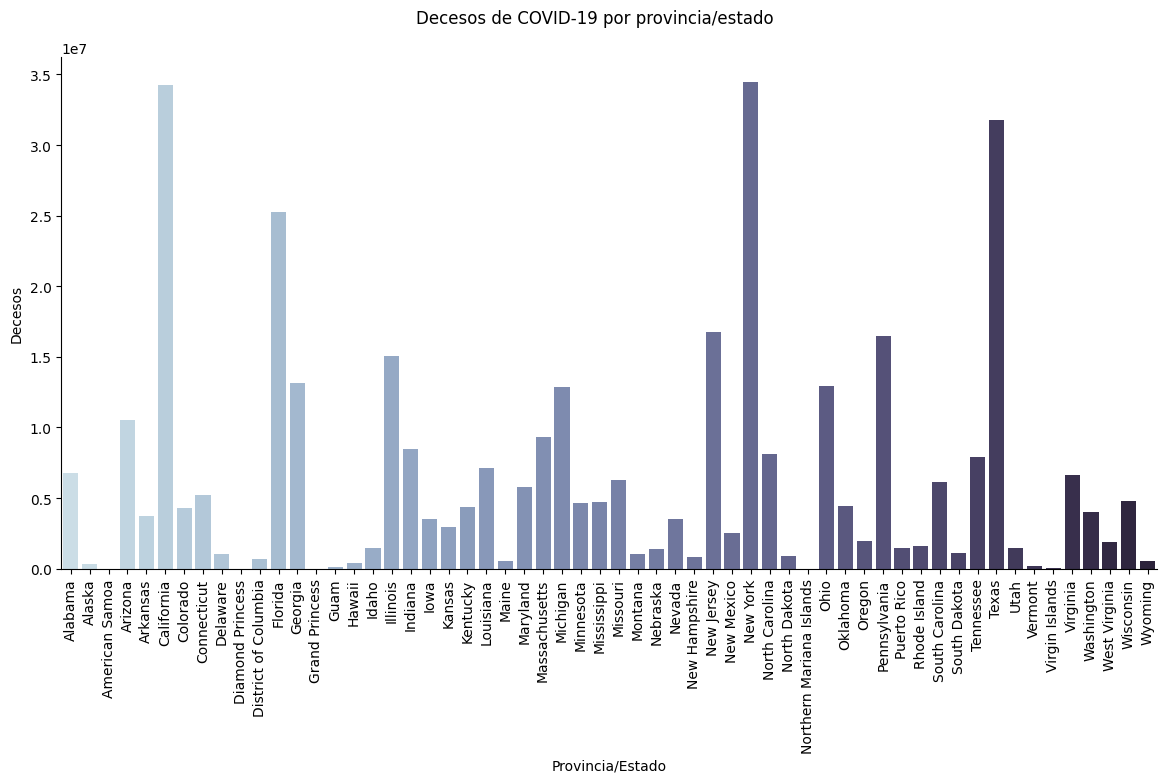

In [100]:
#CREAMOS LA GRAFICA CON PARAMETROS DE AMPLITUD Y ROTACION DE LAS ETIQUETAS EN EL EJE X
g=sns.catplot( x="province/state", y="deaths", kind="bar", data=dfus_sum, aspect=2, height=6, palette="ch:s=.25,rot=-.25")
g.set_xticklabels(rotation=90)
#ESTABLECER TITULO DE LA GRAFICA Y ETIQUETA DE LOS EJE
g.fig.suptitle("Decesos de COVID-19 por provincia/estado", y=1.03)
g.set(xlabel="Provincia/Estado", ylabel="Decesos")

plt.show()

POR ULTIMO, ANALIZAMOS PARA INFORMACION DE LA DF AGGREGATE QUE CONTIENE LA TASA DE CRECIMIENTO PARA ANALIZAR EL  COMPORTAMIENTO RESPECTO AL TIEMPO 

In [143]:
df_aggregate.head()

,Date,Confirmed,Recovered,Deaths,Increase rate
0,2020-01-22,557,30,17,NaN
1,2020-01-23,657,32,18,17.953321
2,2020-01-24,944,39,26,43.683409
3,2020-01-25,1437,42,42,52.224576
4,2020-01-26,2120,56,56,47.529576


In [144]:
#PARA VER EL TAMAÑO DE LA df
df_aggregate.shape

(816, 5)

In [145]:
df_aggregate.isnull().sum()

Date             0
Confirmed        0
Recovered        0
Deaths           0
Increase rate    1
dtype: int64

In [146]:
#COMO TENEMOS UN DATO NULO SIMPLEMENTE LO VOY A DROPEAR
df_aggregate=df_aggregate.dropna()

In [ ]:
df_aggregate

In [148]:
#PRIMERO VOY A HOMOGENIZAR EL HEADER DE LA TABLA
df_aggregate.columns=[c.lower().replace(' ', '_') for c in df_aggregate.columns]
df_aggregate.head()

,date,confirmed,recovered,deaths,increase_rate
1,2020-01-23,657,32,18,17.953321
2,2020-01-24,944,39,26,43.683409
3,2020-01-25,1437,42,42,52.224576
4,2020-01-26,2120,56,56,47.529576
5,2020-01-27,2929,65,82,38.160377


In [149]:
#TRANSFORMAMOS LA COLUMNA DE date DE OBJECT A DATETIME
df_aggregate['date'] = pd.to_datetime(df_aggregate['date'])
df_aggregate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 815 entries, 1 to 815
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           815 non-null    datetime64[ns]
 1   confirmed      815 non-null    int64         
 2   recovered      815 non-null    int64         
 3   deaths         815 non-null    int64         
 4   increase_rate  815 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 38.2 KB


<ipython-input-149-e7f37972d957>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aggregate['date'] = pd.to_datetime(df_aggregate['date'])


In [150]:
# PARA ANALIZAR LA INFORMACION RESPECTO AL TIEMPO HAGO A LA COLUMNA date EL NUEVO INDICE
df_aggregate.set_index('date', inplace=True)
df_aggregate.head()

,confirmed,recovered,deaths,increase_rate
date,,,,
2020-01-23,657,32,18,17.953321
2020-01-24,944,39,26,43.683409
2020-01-25,1437,42,42,52.224576
2020-01-26,2120,56,56,47.529576
2020-01-27,2929,65,82,38.160377


In [178]:
df_aggregate.reset_index('date', inplace=True)
df_aggregate.head()

,date,confirmed,recovered,deaths,increase_rate
0,2020-01-23,657,32,18,17.953321
1,2020-01-24,944,39,26,43.683409
2,2020-01-25,1437,42,42,52.224576
3,2020-01-26,2120,56,56,47.529576
4,2020-01-27,2929,65,82,38.160377


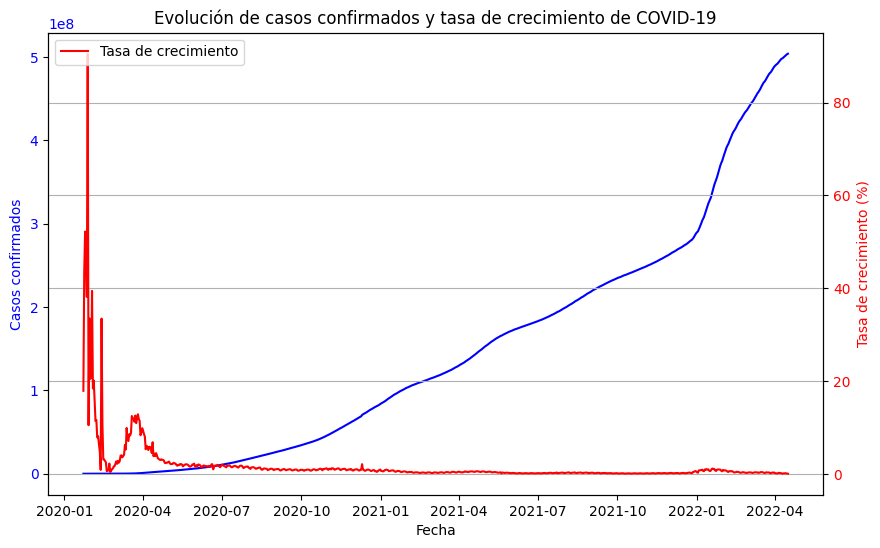

In [180]:
# Crear la figura con Matplotlib
fig, ax1 = plt.subplots(figsize=(10,6))

# Agregar la línea de tiempo en el eje x
ax1.plot(df_aggregate['date'], df_aggregate['confirmed'], color='blue', label='Casos confirmados')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos confirmados', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Agregar la tasa de crecimiento en el eje y secundario
ax2 = ax1.twinx()
ax2.plot(df_aggregate['date'], df_aggregate['increase_rate'], color='red', label='Tasa de crecimiento')
ax2.set_ylabel('Tasa de crecimiento (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Personalizar la figura
plt.title('Evolución de casos confirmados y tasa de crecimiento de COVID-19')
plt.legend(loc='upper left')
plt.grid(True)

# Mostrar la figura
plt.show()


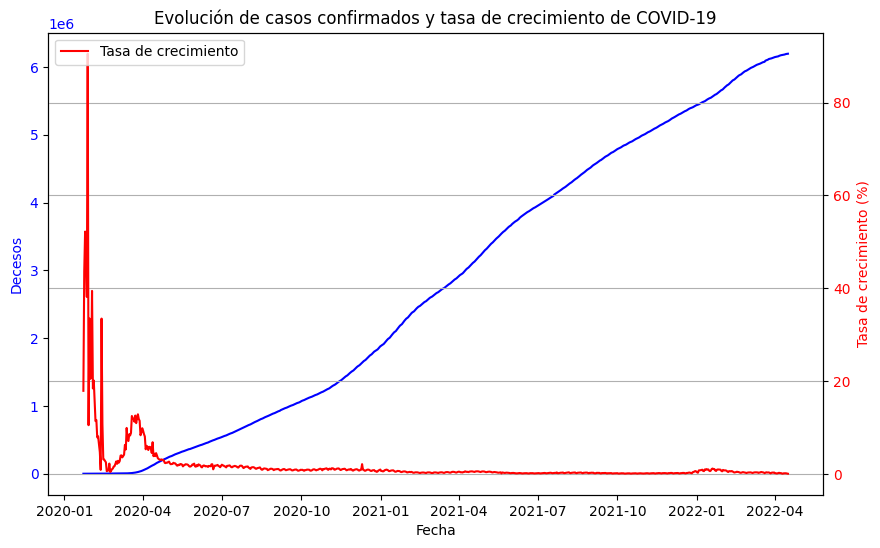

In [183]:
# Crear la figura con Matplotlib
fig, ax1 = plt.subplots(figsize=(10,6))

# Agregar la línea de tiempo en el eje x
ax1.plot(df_aggregate['date'], df_aggregate['deaths'], color='blue', label='Decesos')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Decesos', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Agregar la tasa de crecimiento en el eje y secundario
ax2 = ax1.twinx()
ax2.plot(df_aggregate['date'], df_aggregate['increase_rate'], color='red', label='Tasa de crecimiento')
ax2.set_ylabel('Tasa de crecimiento (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Personalizar la figura
plt.title('Evolución de casos confirmados y tasa de crecimiento de COVID-19')
plt.legend(loc='upper left')
plt.grid(True)

# Mostrar la figura
plt.show()


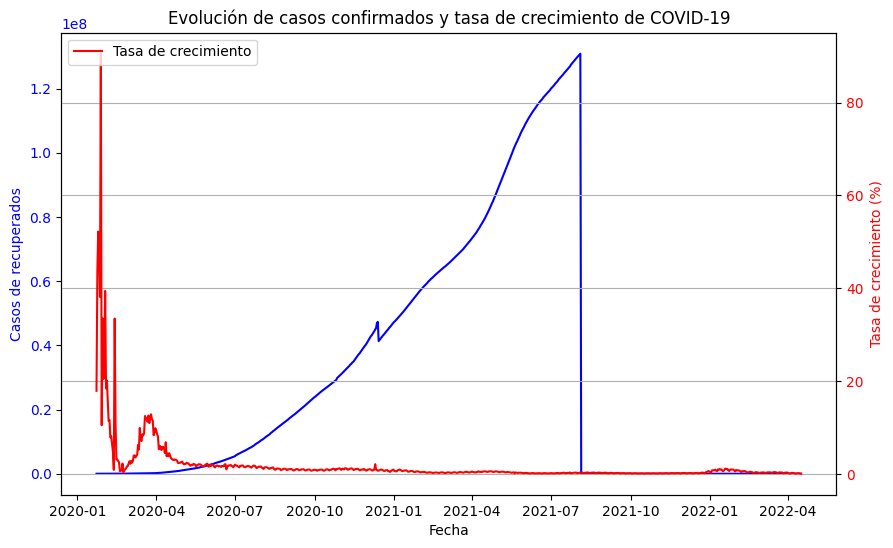

In [184]:
# Crear la figura con Matplotlib
fig, ax1 = plt.subplots(figsize=(10,6))

# Agregar la línea de tiempo en el eje x
ax1.plot(df_aggregate['date'], df_aggregate['recovered'], color='blue', label='Casos de recuperados')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos de recuperados', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Agregar la tasa de crecimiento en el eje y secundario
ax2 = ax1.twinx()
ax2.plot(df_aggregate['date'], df_aggregate['increase_rate'], color='red', label='Tasa de crecimiento')
ax2.set_ylabel('Tasa de crecimiento (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Personalizar la figura
plt.title('Evolución de casos confirmados y tasa de crecimiento de COVID-19')
plt.legend(loc='upper left')
plt.grid(True)

# Mostrar la figura
plt.show()